In [2]:
%matplotlib inline
from datetime import timedelta, datetime
from glob import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib import colors 
import matplotlib.gridspec as gridspec
#import seaborn as sns

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from collections import namedtuple
from shapely import geometry

In [3]:
filedir_root = "/data/oceanparcels/output_data/data_LauraGN/Lorenz_outputs/"

In [4]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

subregion_v02 =  Region(
        region_name="Azores_subregion_02",
        lonmin=-27., 
        lonmax=-21., 
        latmin=32.5, 
        latmax=36.5
)#lomin -35 #lomax -18 # lamin 30 # lamax 40

# FTLE calc:

In [5]:
from math import sin, cos, sqrt, atan2, radians
import numpy as np
import xarray as xr
import numpy.linalg as LA

# Adapted from test03, adding the sqrt in FTLE calcn after discussing with Darshika (this version should be up to date w/ github function!!!
# reorganized filename and savename so easier to modify!!!

def dist_pairs_km(inlon1, inlon2, inlat1, inlat2):
    """
    source: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
    
    """
    # approximate radius of earth in km
    R = 6373.0

    lon1 = radians(inlon1)
    lat1 = radians(inlat1)
    lon2 = radians(inlon2)
    lat2 = radians(inlat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

## Week 01 (from day 1):

In [7]:
ds_nT_Apr =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_0401_biweekly_hourly_BACK_v02.nc')
ds_nT_May =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_0501_biweekly_hourly_BACK_v02.nc')
ds_nT_Jun =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_0601_biweekly_hourly_BACK_v02.nc')
ds_nT_Oct =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_1001_biweekly_hourly_BACK_v02.nc')
ds_nT_Nov =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_1101_biweekly_hourly_BACK_v02.nc')
ds_nT_Dec =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_1201_biweekly_hourly_BACK_v02.nc')

ds_wT_Apr =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_0401_biweekly_hourly_BACK_v02.nc')
ds_wT_May =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_0501_biweekly_hourly_BACK_v02.nc')
ds_wT_Jun =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_0601_biweekly_hourly_BACK_v02.nc')
ds_wT_Oct =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_1001_biweekly_hourly_BACK_v02.nc')
ds_wT_Nov =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_1101_biweekly_hourly_BACK_v02.nc')
ds_wT_Dec =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_1201_biweekly_hourly_BACK_v02.nc')



# Plot:

* Winter:

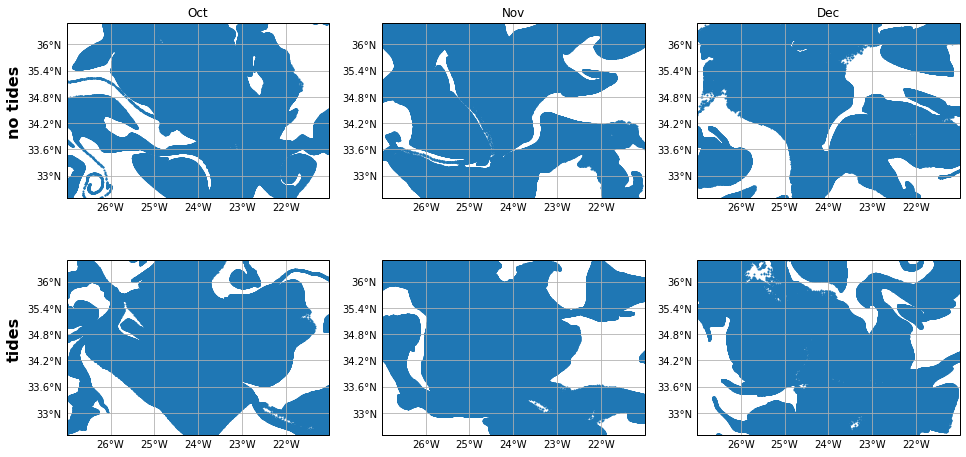

In [12]:
plt.figure(figsize=(16,8)) #(17,5)

ax1 = plt.subplot(231, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_nT_Oct['lon'][:,-1], ds_nT_Oct['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #Decker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.text(-0.17, 0.55, 'no tides', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes, size=16, weight='bold')
ax1.set_title('Oct')

ax1 = plt.subplot(232, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_nT_Nov['lon'][:,-1], ds_nT_Nov['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #Decker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('Nov')

ax1 = plt.subplot(233, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_nT_Dec['lon'][:,-1], ds_nT_Dec['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #Decker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('Dec')

ax1 = plt.subplot(234, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_wT_Oct['lon'][:,-1], ds_wT_Oct['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #Decker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.text(-0.17, 0.55, 'tides', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes, size=16, weight='bold')

ax1 = plt.subplot(235, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_wT_Nov['lon'][:,-1], ds_wT_Nov['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #Decker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax1 = plt.subplot(236, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_wT_Dec['lon'][:,-1], ds_wT_Dec['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #Decker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()

* Summer

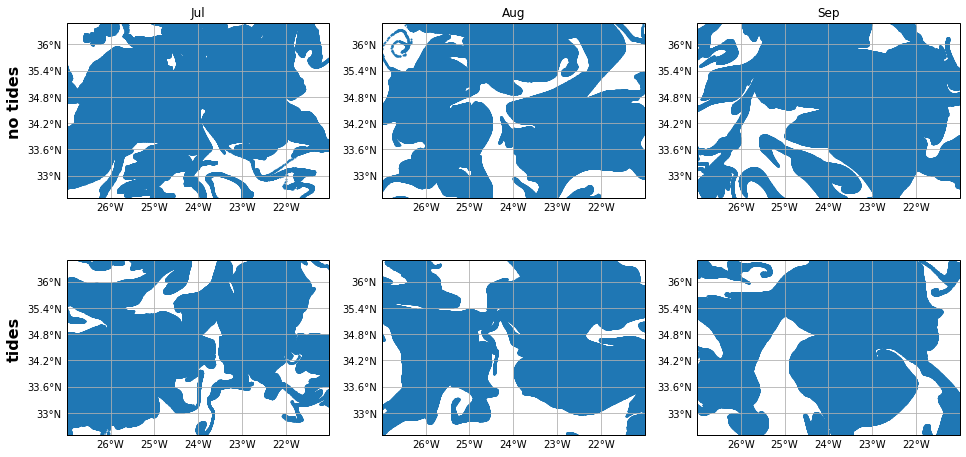

In [11]:
plt.figure(figsize=(16,8)) #(17,5)

ax1 = plt.subplot(231, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_nT_Jul['lon'][:,-1], ds_nT_Jul['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.text(-0.17, 0.55, 'no tides', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes, size=16, weight='bold')
ax1.set_title('Jul')

ax1 = plt.subplot(232, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_nT_Aug['lon'][:,-1], ds_nT_Aug['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('Aug')

ax1 = plt.subplot(233, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_nT_Sep['lon'][:,-1], ds_nT_Sep['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax1.set_title('Sep')

ax1 = plt.subplot(234, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_wT_Jul['lon'][:,-1], ds_wT_Jul['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
ax1.text(-0.17, 0.55, 'tides', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes, size=16, weight='bold')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax1 = plt.subplot(235, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_wT_Aug['lon'][:,-1], ds_wT_Aug['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

ax1 = plt.subplot(236, projection=ccrs.PlateCarree())
ax1.coastlines(resolution='50m')
ax1.scatter(ds_wT_Sep['lon'][:,-1], ds_wT_Sep['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
#gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()

# FTLE calcs:

In [8]:
savedir = '/data/oceanparcels/output_data/data_LauraGN/outputs_parcels/FTLE/'

In [9]:
nmonths = ['Apr', 'May']#, 'Jun', 'Oct', 'Nov', 'Dec']#, 'Aug', 'Sep'] 
ds_nT = [ds_nT_Apr, ds_nT_May] #, ds_nT_Jun, ds_nT_Oct, ds_nT_Nov, ds_nT_Dec]#, ds_nT_Aug, ds_nT_Sep]
ds_wT = [ds_wT_Apr, ds_wT_May] #, ds_wT_Jun, ds_wT_Oct, ds_wT_Nov, ds_wT_Dec]#, ds_wT_Aug, ds_wT_Sep]

* ntides:

In [10]:
t_filename = 'nT'

In [11]:
Td = 7. # days
step = .004 # degrees
grid_lons, grid_lats = np.meshgrid(np.arange(-27, -21+step, step), np.arange(32.5, 36.5+step, step))

for ii in range(0, len(nmonths)):
    nmonth = nmonths[ii]

    savename = savedir + 'FTLE_b_' + t_filename + '_' + nmonth + '_biw_w01_v02' + '.npz' 

    ds = ds_nT[ii]

    ######
    x0 = np.reshape(ds['lon'][:,0].data, ( grid_lons.shape[0], grid_lons.shape[1] ))
    x1 = np.reshape(ds['lon'][:,-1].data,( grid_lons.shape[0], grid_lons.shape[1] ))
    y0 = np.reshape(ds['lat'][:,0].data, ( grid_lons.shape[0], grid_lons.shape[1] )) 
    y1 = np.reshape(ds['lat'][:,-1].data, ( grid_lons.shape[0], grid_lons.shape[1] ))


    H = x0.shape[0] 
    L = x0.shape[1]

    FTLE_b = np.ones_like(x0) * np.nan

    J = np.empty([2,2],float)

    # 1, H-1 --> to ignore bordersx for now
    for i in range(1, H-1): # 0, H-2
        for j in range(1, L-1): # 0, L-2
            J[0][0] = dist_pairs_km(x1[i,j],x1[i-1,j], y1[i,j],y1[i-1,j]) / dist_pairs_km(x0[i,j],x0[i-1,j], y0[i,j],y0[i-1,j])
            ##gradF[:,0,0] = (X1rav[x1p] - X1rav[x1m])/dx1
            J[0][1] = dist_pairs_km(x1[i,j],x1[i,j-1], y1[i,j],y1[i,j-1]) / dist_pairs_km(x0[i,j],x0[i,j-1], y0[i,j],y0[i,j-1])
            J[1][0] = dist_pairs_km(x1[i,j],x1[i,j+1], y1[i,j],y1[i,j+1]) / dist_pairs_km(x0[i,j],x0[i,j+1], y0[i,j],y0[i,j+1])
            J[1][1] = dist_pairs_km(x1[i,j],x1[i+1,j], y1[i,j],y1[i+1,j]) / dist_pairs_km(x0[i,j],x0[i+1,j], y0[i,j],y0[i+1,j])

            if np.isnan(J).any():
                continue  
            else:

                D = np.dot(np.transpose(J),J)
                ##-->same
                # its largest eigenvalue
                lamda = LA.eigvals(D)
                ##-->same
                lam_max = max(lamda)
                FTLE_b[i][j] = (1/Td) * np.log(np.sqrt(lam_max))
                ##-->from sinha paper and from https://github.com/anirban89/llc_offline_lagrangian_analysis/blob/master/plot_lagrangian_diagnostics.ipynb

    #savedir = filedir_root + 'FTLE/'
    #savename = savedir + savename #'KDE_' + nfile.split('/')[-1].split('.nc')[0] + '.npz'
    savename = savename
    np.savez(savename, FTLE_b=FTLE_b) 

* wtides:

In [12]:
t_filename = 'wT'

In [13]:
Td = 7. # days
step = .004 # degrees
grid_lons, grid_lats = np.meshgrid(np.arange(-27, -21+step, step), np.arange(32.5, 36.5+step, step))

for ii in range(0, len(nmonths)):
    nmonth = nmonths[ii]

    savename = savedir + 'FTLE_b_' + t_filename + '_' + nmonth + '_biw_w01_v02' + '.npz' 

    ds = ds_wT[ii]

    ######
    x0 = np.reshape(ds['lon'][:,0].data, ( grid_lons.shape[0], grid_lons.shape[1] ))
    x1 = np.reshape(ds['lon'][:,-1].data,( grid_lons.shape[0], grid_lons.shape[1] ))
    y0 = np.reshape(ds['lat'][:,0].data, ( grid_lons.shape[0], grid_lons.shape[1] )) 
    y1 = np.reshape(ds['lat'][:,-1].data, ( grid_lons.shape[0], grid_lons.shape[1] ))


    H = x0.shape[0] 
    L = x0.shape[1]

    FTLE_b = np.ones_like(x0) * np.nan

    J = np.empty([2,2],float)

    # 1, H-1 --> to ignore bordersx for now
    for i in range(1, H-1): # 0, H-2
        for j in range(1, L-1): # 0, L-2
            J[0][0] = dist_pairs_km(x1[i,j],x1[i-1,j], y1[i,j],y1[i-1,j]) / dist_pairs_km(x0[i,j],x0[i-1,j], y0[i,j],y0[i-1,j])
            ##gradF[:,0,0] = (X1rav[x1p] - X1rav[x1m])/dx1
            J[0][1] = dist_pairs_km(x1[i,j],x1[i,j-1], y1[i,j],y1[i,j-1]) / dist_pairs_km(x0[i,j],x0[i,j-1], y0[i,j],y0[i,j-1])
            J[1][0] = dist_pairs_km(x1[i,j],x1[i,j+1], y1[i,j],y1[i,j+1]) / dist_pairs_km(x0[i,j],x0[i,j+1], y0[i,j],y0[i,j+1])
            J[1][1] = dist_pairs_km(x1[i,j],x1[i+1,j], y1[i,j],y1[i+1,j]) / dist_pairs_km(x0[i,j],x0[i+1,j], y0[i,j],y0[i+1,j])

            if np.isnan(J).any():
                continue  
            else:

                D = np.dot(np.transpose(J),J)
                ##-->same
                # its largest eigenvalue
                lamda = LA.eigvals(D)
                ##-->same
                lam_max = max(lamda)
                FTLE_b[i][j] = (1/Td) * np.log(np.sqrt(lam_max))
                ##-->from sinha paper and from https://github.com/anirban89/llc_offline_lagrangian_analysis/blob/master/plot_lagrangian_diagnostics.ipynb

    #savedir = filedir_root + 'FTLE/'
    #savename = savedir + savename #'KDE_' + nfile.split('/')[-1].split('.nc')[0] + '.npz'
    savename = savename
    np.savez(savename, FTLE_b=FTLE_b) 

# --> modify below!

## Week 02 (from day 15):

In [18]:
!ls /data/oceanparcels/output_data/data_LauraGN/Lorenz_outputs/*15_biw*v02*

/data/oceanparcels/output_data/data_LauraGN/Lorenz_outputs/Particle_AZO_grid_ntides_0115_biweekly_hourly_BACK_v02.nc
/data/oceanparcels/output_data/data_LauraGN/Lorenz_outputs/Particle_AZO_grid_ntides_0215_biweekly_hourly_BACK_v02.nc
/data/oceanparcels/output_data/data_LauraGN/Lorenz_outputs/Particle_AZO_grid_ntides_0315_biweekly_hourly_BACK_v02.nc
/data/oceanparcels/output_data/data_LauraGN/Lorenz_outputs/Particle_AZO_grid_ntides_0815_biweekly_hourly_BACK_v02.nc
/data/oceanparcels/output_data/data_LauraGN/Lorenz_outputs/Particle_AZO_grid_ntides_0915_biweekly_hourly_BACK_v02.nc
/data/oceanparcels/output_data/data_LauraGN/Lorenz_outputs/Particle_AZO_grid_wtides_0115_biweekly_hourly_BACK_v02.nc
/data/oceanparcels/output_data/data_LauraGN/Lorenz_outputs/Particle_AZO_grid_wtides_0215_biweekly_hourly_BACK_v02.nc
/data/oceanparcels/output_data/data_LauraGN/Lorenz_outputs/Particle_AZO_grid_wtides_0315_biweekly_hourly_BACK_v02.nc
/data/oceanparcels/output_data/data_LauraGN/Lorenz_outputs/Parti

In [14]:
ds_nT_Apr_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_0415_biweekly_hourly_BACK_v02.nc')
ds_nT_May_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_0515_biweekly_hourly_BACK_v02.nc')
ds_nT_Jun_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_0615_biweekly_hourly_BACK_v02.nc')
ds_nT_Oct_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_1015_biweekly_hourly_BACK_v02.nc')
ds_nT_Nov_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_1115_biweekly_hourly_BACK_v02.nc')
ds_nT_Dec_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_ntides_1215_biweekly_hourly_BACK_v02.nc')

ds_wT_Apr_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_0415_biweekly_hourly_BACK_v02.nc')
ds_wT_May_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_0515_biweekly_hourly_BACK_v02.nc')
ds_wT_Jun_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_0615_biweekly_hourly_BACK_v02.nc')
ds_wT_Oct_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_1015_biweekly_hourly_BACK_v02.nc')
ds_wT_Nov_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_1115_biweekly_hourly_BACK_v02.nc')
ds_wT_Dec_w02 =  xr.open_dataset(filedir_root + 'Particle_AZO_grid_wtides_1215_biweekly_hourly_BACK_v02.nc')



# Plot:

In [15]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

subregion_v02 =  Region(
        region_name="Azores_subregion_02",
        lonmin=-27., 
        lonmax=-21., 
        latmin=32.5, 
        latmax=36.5
)#lomin -35 #lomax -18 # lamin 30 # lamax 40

* Winter:

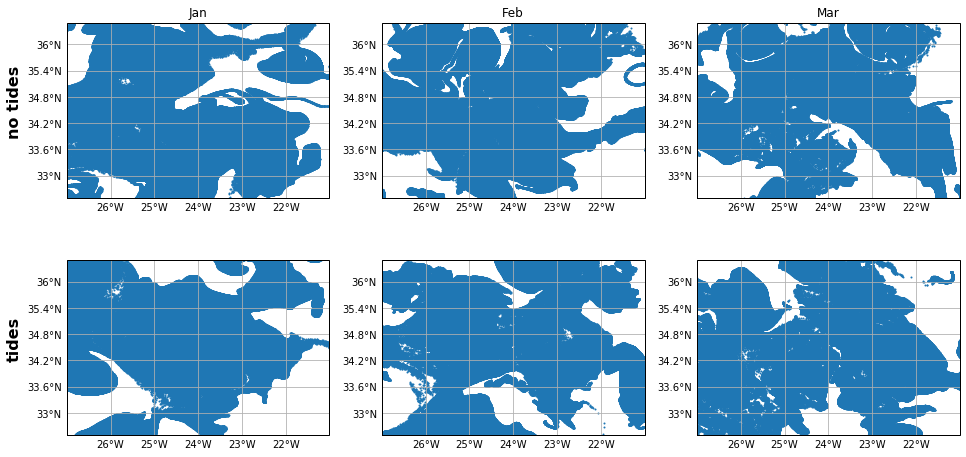

In [21]:
# plt.figure(figsize=(16,8)) #(17,5)

# ax1 = plt.subplot(231, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_nT_Jan['lon'][:,-1], ds_nT_Jan['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax1.text(-0.17, 0.55, 'no tides', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax1.transAxes, size=16, weight='bold')
# ax1.set_title('Jan')

# ax1 = plt.subplot(232, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_nT_Feb['lon'][:,-1], ds_nT_Feb['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax1.set_title('Feb')

# ax1 = plt.subplot(233, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_nT_Mar['lon'][:,-1], ds_nT_Mar['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# #gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax1.set_title('Mar')

# ax1 = plt.subplot(234, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_wT_Jan['lon'][:,-1], ds_wT_Jan['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# #gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax1.text(-0.17, 0.55, 'tides', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax1.transAxes, size=16, weight='bold')

# ax1 = plt.subplot(235, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_wT_Feb['lon'][:,-1], ds_wT_Feb['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# #gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

# ax1 = plt.subplot(236, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_wT_Mar['lon'][:,-1], ds_wT_Mar['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# #gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

# plt.show()

* Summer

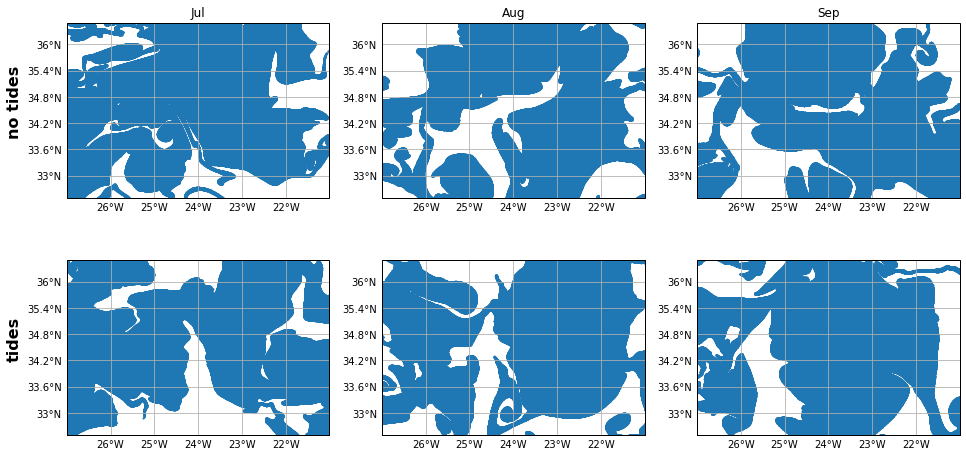

In [22]:
# plt.figure(figsize=(16,8)) #(17,5)

# ax1 = plt.subplot(231, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_nT_Jul['lon'][:,-1], ds_nT_Jul['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax1.text(-0.17, 0.55, 'no tides', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax1.transAxes, size=16, weight='bold')
# ax1.set_title('Jul')

# ax1 = plt.subplot(232, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_nT_Aug['lon'][:,-1], ds_nT_Aug['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax1.set_title('Aug')

# ax1 = plt.subplot(233, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_nT_Sep['lon'][:,-1], ds_nT_Sep['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# #gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# ax1.set_title('Sep')

# ax1 = plt.subplot(234, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_wT_Jul['lon'][:,-1], ds_wT_Jul['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# ax1.text(-0.17, 0.55, 'tides', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax1.transAxes, size=16, weight='bold')
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# #gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

# ax1 = plt.subplot(235, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_wT_Aug['lon'][:,-1], ds_wT_Aug['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# #gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

# ax1 = plt.subplot(236, projection=ccrs.PlateCarree())
# ax1.coastlines(resolution='50m')
# ax1.scatter(ds_wT_Sep['lon'][:,-1], ds_wT_Sep['lat'][:,-1], s=1, transform=ccrs.PlateCarree()) #marker='o'
# ax1.set_xlim([subregion_v02.lonmin, subregion_v02.lonmax])
# ax1.set_ylim([subregion_v02.latmin, subregion_v02.latmax])
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
# gl.xlabels_top = False
# gl.ylabels_right = False
# #gl.ylocator = mticker.FixedLocator([0, 5, 10, 15, 20, 25, 30, 35])
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER

# plt.show()

# FTLE calcs:

In [16]:
from math import sin, cos, sqrt, atan2, radians
import numpy as np
import xarray as xr
import numpy.linalg as LA

# Adapted from test03, adding the sqrt in FTLE calcn after discussing with Darshika (this version should be up to date w/ github function!!!
# reorganized filename and savename so easier to modify!!!

def dist_pairs_km(inlon1, inlon2, inlat1, inlat2):
    """
    source: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
    
    """
    # approximate radius of earth in km
    R = 6373.0

    lon1 = radians(inlon1)
    lat1 = radians(inlat1)
    lon2 = radians(inlon2)
    lat2 = radians(inlat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [29]:
nmonths = ['Jun', 'Oct', 'Nov', 'Dec'] #['Apr', 'May', 

In [30]:
ds_nT_w02 = [ds_nT_Jun_w02, ds_nT_Oct_w02, ds_nT_Nov_w02, ds_nT_Dec_w02] #[ds_nT_Apr_w02, ds_nT_May_w02, 
ds_wT_w02 = [ds_wT_Jun_w02, ds_wT_Oct_w02, ds_wT_Nov_w02, ds_wT_Dec_w02] #[ds_wT_Apr_w02, ds_wT_May_w02, 

* ntides:

In [31]:
t_filename = 'nT'

In [32]:
Td = 7. # days
step = .004 # degrees
grid_lons, grid_lats = np.meshgrid(np.arange(-27, -21+step, step), np.arange(32.5, 36.5+step, step))

for ii in range(0, len(nmonths)):
    nmonth = nmonths[ii]

    savename = savedir + 'FTLE_b_' + t_filename + '_' + nmonth + '_biw_w02_v02' + '.npz' 

    ds = ds_nT_w02[ii]

    ######
    x0 = np.reshape(ds['lon'][:,0].data, ( grid_lons.shape[0], grid_lons.shape[1] ))
    x1 = np.reshape(ds['lon'][:,-1].data,( grid_lons.shape[0], grid_lons.shape[1] ))
    y0 = np.reshape(ds['lat'][:,0].data, ( grid_lons.shape[0], grid_lons.shape[1] )) 
    y1 = np.reshape(ds['lat'][:,-1].data, ( grid_lons.shape[0], grid_lons.shape[1] ))


    H = x0.shape[0] 
    L = x0.shape[1]

    FTLE_b = np.ones_like(x0) * np.nan

    J = np.empty([2,2],float)

    # 1, H-1 --> to ignore bordersx for now
    for i in range(1, H-1): # 0, H-2
        for j in range(1, L-1): # 0, L-2
            J[0][0] = dist_pairs_km(x1[i,j],x1[i-1,j], y1[i,j],y1[i-1,j]) / dist_pairs_km(x0[i,j],x0[i-1,j], y0[i,j],y0[i-1,j])
            ##gradF[:,0,0] = (X1rav[x1p] - X1rav[x1m])/dx1
            J[0][1] = dist_pairs_km(x1[i,j],x1[i,j-1], y1[i,j],y1[i,j-1]) / dist_pairs_km(x0[i,j],x0[i,j-1], y0[i,j],y0[i,j-1])
            J[1][0] = dist_pairs_km(x1[i,j],x1[i,j+1], y1[i,j],y1[i,j+1]) / dist_pairs_km(x0[i,j],x0[i,j+1], y0[i,j],y0[i,j+1])
            J[1][1] = dist_pairs_km(x1[i,j],x1[i+1,j], y1[i,j],y1[i+1,j]) / dist_pairs_km(x0[i,j],x0[i+1,j], y0[i,j],y0[i+1,j])

            if np.isnan(J).any():
                continue  
            else:

                D = np.dot(np.transpose(J),J)
                ##-->same
                # its largest eigenvalue
                lamda = LA.eigvals(D)
                ##-->same
                lam_max = max(lamda)
                FTLE_b[i][j] = (1/Td) * np.log(np.sqrt(lam_max))
                ##-->from sinha paper and from https://github.com/anirban89/llc_offline_lagrangian_analysis/blob/master/plot_lagrangian_diagnostics.ipynb

    #savedir = filedir_root + 'FTLE/'
    #savename = savedir + savename #'KDE_' + nfile.split('/')[-1].split('.nc')[0] + '.npz'
    np.savez(savename, FTLE_b=FTLE_b) 

* wtides:

In [33]:
t_filename = 'wT'

In [34]:
Td = 7. # days
step = .004 # degrees
grid_lons, grid_lats = np.meshgrid(np.arange(-27, -21+step, step), np.arange(32.5, 36.5+step, step))

for ii in range(0, len(nmonths)):
    nmonth = nmonths[ii]

    savename = savedir + 'FTLE_b_' + t_filename + '_' + nmonth + '_biw_w02_v02' + '.npz' 

    ds = ds_wT_w02[ii]

    ######
    x0 = np.reshape(ds['lon'][:,0].data, ( grid_lons.shape[0], grid_lons.shape[1] ))
    x1 = np.reshape(ds['lon'][:,-1].data,( grid_lons.shape[0], grid_lons.shape[1] ))
    y0 = np.reshape(ds['lat'][:,0].data, ( grid_lons.shape[0], grid_lons.shape[1] )) 
    y1 = np.reshape(ds['lat'][:,-1].data, ( grid_lons.shape[0], grid_lons.shape[1] ))


    H = x0.shape[0] 
    L = x0.shape[1]

    FTLE_b = np.ones_like(x0) * np.nan

    J = np.empty([2,2],float)

    # 1, H-1 --> to ignore bordersx for now
    for i in range(1, H-1): # 0, H-2
        for j in range(1, L-1): # 0, L-2
            J[0][0] = dist_pairs_km(x1[i,j],x1[i-1,j], y1[i,j],y1[i-1,j]) / dist_pairs_km(x0[i,j],x0[i-1,j], y0[i,j],y0[i-1,j])
            ##gradF[:,0,0] = (X1rav[x1p] - X1rav[x1m])/dx1
            J[0][1] = dist_pairs_km(x1[i,j],x1[i,j-1], y1[i,j],y1[i,j-1]) / dist_pairs_km(x0[i,j],x0[i,j-1], y0[i,j],y0[i,j-1])
            J[1][0] = dist_pairs_km(x1[i,j],x1[i,j+1], y1[i,j],y1[i,j+1]) / dist_pairs_km(x0[i,j],x0[i,j+1], y0[i,j],y0[i,j+1])
            J[1][1] = dist_pairs_km(x1[i,j],x1[i+1,j], y1[i,j],y1[i+1,j]) / dist_pairs_km(x0[i,j],x0[i+1,j], y0[i,j],y0[i+1,j])

            if np.isnan(J).any():
                continue  
            else:

                D = np.dot(np.transpose(J),J)
                ##-->same
                # its largest eigenvalue
                lamda = LA.eigvals(D)
                ##-->same
                lam_max = max(lamda)
                FTLE_b[i][j] = (1/Td) * np.log(np.sqrt(lam_max))
                ##-->from sinha paper and from https://github.com/anirban89/llc_offline_lagrangian_analysis/blob/master/plot_lagrangian_diagnostics.ipynb

    #savedir = filedir_root + 'FTLE/'
    #savename = savedir + savename #'KDE_' + nfile.split('/')[-1].split('.nc')[0] + '.npz'
    np.savez(savename, FTLE_b=FTLE_b) 

In [26]:
savedir

'/data/oceanparcels/output_data/data_LauraGN/outputs_parcels/FTLE/'

In [35]:
!ls -trl /data/oceanparcels/output_data/data_LauraGN/outputs_parcels/FTLE/ | tail

-rw-r--r-- 1 gomez023 science_bfs_projects_oceanparcels 12028262 Feb  1 16:43 FTLE_b_wT_Apr_biw_w02_v02.npz
-rw-r--r-- 1 gomez023 science_bfs_projects_oceanparcels 12028262 Feb  1 16:47 FTLE_b_wT_May_biw_w02_v02.npz
-rw-r--r-- 1 gomez023 science_bfs_projects_oceanparcels 12028262 Feb  1 16:54 FTLE_b_nT_Jun_biw_w02_v02.npz
-rw-r--r-- 1 gomez023 science_bfs_projects_oceanparcels 12028262 Feb  1 16:57 FTLE_b_nT_Oct_biw_w02_v02.npz
-rw-r--r-- 1 gomez023 science_bfs_projects_oceanparcels 12028262 Feb  1 17:01 FTLE_b_nT_Nov_biw_w02_v02.npz
-rw-r--r-- 1 gomez023 science_bfs_projects_oceanparcels 12028262 Feb  1 17:05 FTLE_b_nT_Dec_biw_w02_v02.npz
-rw-r--r-- 1 gomez023 science_bfs_projects_oceanparcels 12028262 Feb  1 17:09 FTLE_b_wT_Jun_biw_w02_v02.npz
-rw-r--r-- 1 gomez023 science_bfs_projects_oceanparcels 12028262 Feb  1 17:13 FTLE_b_wT_Oct_biw_w02_v02.npz
-rw-r--r-- 1 gomez023 science_bfs_projects_oceanparcels 12028262 Feb  1 17:17 FTLE_b_wT_Nov_biw_w02_v02.npz
-rw-r--r-- 1 gomez023 scienc